# CSE 4238 | Assignment 3
---
---

# Sentiment Analysis for Tweets | Bi-LSTM | TensorFlow
---
---

## Prepare Dataset
---
Download the [dataset](https://drive.google.com/file/d/1hgfcQHIlfnnDTSUAA_3--m-YA7BelKl3/view).

In [ ]:
# The dataset => https://drive.google.com/file/d/1hgfcQHIlfnnDTSUAA_3--m-YA7BelKl3/view
!gdown --id 1hgfcQHIlfnnDTSUAA_3--m-YA7BelKl3

Downloading...
From: https://drive.google.com/uc?id=1hgfcQHIlfnnDTSUAA_3--m-YA7BelKl3
To: /content/Dataset 3.csv
100% 999k/999k [00:00<00:00, 64.1MB/s]


## Import Required Libraries
---
Importing libraries that will be required for the experiment.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from keras import backend as K
from keras.utils.vis_utils import plot_model

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

## Read the Original Data
---
Read the original data from the CSV file found

In [ ]:
data = pd.read_csv('/content/Dataset 3.csv', engine = 'python')

data

,tweets,sentiment
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


## Understanding Data
---

Randomize the data and see what are the labels along with data in CSV

In [ ]:
data = data.sample(frac = 1., random_state = 14).reset_index(drop = True)

print(data['sentiment'].value_counts(0))
data

0    8000
1    2314
Name: sentiment, dtype: int64


,tweets,sentiment
0,@1WineDude That's a really cool giveaway!,0
1,Need a good web series? Check out GIANTS on Yo...,1
2,Procastinated by doing up a new playlist for T...,0
3,"@ZeenaBoBeena eeeek!!!! Good luck, Zeena!!! Yo...",0
4,@ChynaDoll74 Good morning to you too,0
...,...,...
10309,Summer session starts today Why am I smiling.,0
10310,@Desireeeeee really me to.!,0
10311,@Jason_Pollock I think they heard you.,0
10312,@OliviaMaynard13 You're most welcome. I don't ...,1


## Dividing Dataset
---
Dividing dataset into 6:2:2 ratio as Training:Validation:Testing.

Also, *EPOCH* variable is declared for controlling how many epochs for training.

After that, observe the data in Train, Val and Test splits.

ltimatey, convert the data into NumPy array for later usage.

In [ ]:
EPOCH = 10

split_val = int(0.2 * data.shape[0])

dataTest = data.iloc[-split_val :]
dataVal = data.iloc[- 2 * split_val : -split_val]
dataTrain = data.iloc[: - 2 * split_val]

In [ ]:
print(dataTrain['sentiment'].value_counts())

dataTrain

0    4784
1    1406
Name: sentiment, dtype: int64


,tweets,sentiment
0,@1WineDude That's a really cool giveaway!,0
1,Need a good web series? Check out GIANTS on Yo...,1
2,Procastinated by doing up a new playlist for T...,0
3,"@ZeenaBoBeena eeeek!!!! Good luck, Zeena!!! Yo...",0
4,@ChynaDoll74 Good morning to you too,0
...,...,...
6185,"free draw, lit easily, puffing away",0
6186,Depression is coming i feel it my veins just w...,1
6187,at gator joe's with heather and then movies to...,0
6188,Ughhh so over nightmares - So Instead of sleep...,0


In [ ]:
print(dataVal['sentiment'].value_counts())

dataVal

0    1606
1     456
Name: sentiment, dtype: int64


,tweets,sentiment
6190,"@pilucha ok, no more drinking away of the sorr...",0
6191,Earl's wearing a tie,0
6192,Loving @gilesbennet teaching style - like Dr S...,0
6193,hangin with ledd nd court.,0
6194,under 24 hours left to vote for @protagonize a...,0
...,...,...
8247,Look at the cute hat I got today...I look scar...,0
8248,@firesty hey ya )) like ur new pic i have one...,0
8249,@Styla73 Thank you.,0
8250,@stephjonesmusic http://twitpic.com/6bclz - ah...,0


In [ ]:
print(dataTest['sentiment'].value_counts())

dataTest

0    1610
1     452
Name: sentiment, dtype: int64


,tweets,sentiment
8252,One of my mini poems. #helenswriting#mentalhea...,1
8253,@y2kprawn you went to college here? Didn't kno...,0
8254,The Young Life Podcast #1 - Depression 101: h...,1
8255,'s hair is so soft today.,0
8256,At the point where I'm legitimately pissed whe...,1
...,...,...
10309,Summer session starts today Why am I smiling.,0
10310,@Desireeeeee really me to.!,0
10311,@Jason_Pollock I think they heard you.,0
10312,@OliviaMaynard13 You're most welcome. I don't ...,1


In [ ]:
trainX = np.array(dataTrain.iloc[:, 0])
trainY = np.array(dataTrain.iloc[:, 1])

valX = np.array(dataVal.iloc[:, 0])
valY = np.array(dataVal.iloc[:, 1])

testX = np.array(dataTest.iloc[:, 0])
testY = np.array(dataTest.iloc[:, 1])

# # To check the outcome
# print(trainX)
# print(trainY)
# print(valX)
# print(valY)
# print(testX)
# print(testY)

# print(trainX.shape)
# print(trainY.shape)
# print(valX.shape)
# print(valY.shape)
# print(testX.shape)
# print(testY.shape)

## Tokenizing Data
---

Processing the data. Use train data to fit on the text. Later use it to construct sequences for all of the train, val, test quality.

In [ ]:
top_k = 50000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = top_k,
                                                  oov_token = "<unk>",
                                                  filters = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~')
tokenizer.fit_on_texts(trainX)

tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

train_seqs = tokenizer.texts_to_sequences(trainX)
val_seqs = tokenizer.texts_to_sequences(valX)
test_seqs = tokenizer.texts_to_sequences(testX)

train_seqs = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding = 'pre')
val_seqs = tf.keras.preprocessing.sequence.pad_sequences(val_seqs, padding = 'pre')
test_seqs = tf.keras.preprocessing.sequence.pad_sequences(test_seqs, padding = 'pre')

In [ ]:
# # To check the outcome
# print(trainX)
# print(valX)
# print(testX)
# print('=====')
# print(train_seqs)
# print(val_seqs)
# print(test_seqs)
# print('=====')
# print(train_seqs.shape)
# print(val_seqs.shape)
# print(test_seqs.shape)

## Develop Model
---
Develop the model and print it.

Train the model and observe the values.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2072576   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 512)         788480    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 1024)        4198400   
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 128)         557568    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 16)                8768      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 7,625,809
Trainable params: 7,625,809
Non-trainable params: 0
______________________________________________

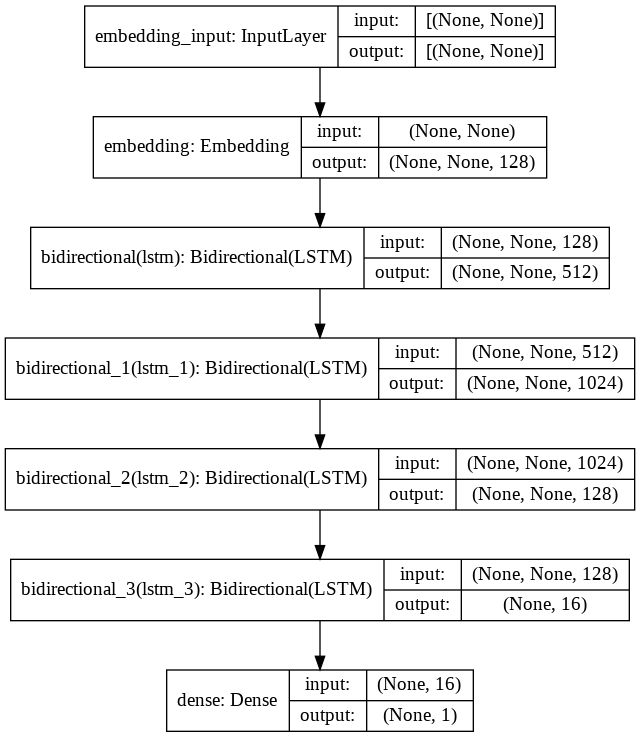

In [ ]:
model = Sequential()
model.add(layers.Embedding(len(tokenizer.word_index), 128))
model.add(layers.Bidirectional(layers.LSTM(256, return_sequences = True, dropout = 0.2)))
model.add(layers.Bidirectional(layers.LSTM(512, return_sequences = True, dropout = 0.2)))
model.add(layers.Bidirectional(layers.LSTM(64, return_sequences = True, dropout = 0.2)))
model.add(layers.Bidirectional(layers.LSTM(8, dropout = 0.2)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()
plot_model(model, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

Epoch 1/10
194/194 [==============================] - 65s 240ms/step - loss: 0.4562 - accuracy: 0.8233 - val_loss: 0.5299 - val_accuracy: 0.7789
Epoch 2/10
194/194 [==============================] - 43s 221ms/step - loss: 0.5372 - accuracy: 0.7729 - val_loss: 0.5290 - val_accuracy: 0.7789
Epoch 3/10
194/194 [==============================] - 43s 223ms/step - loss: 0.5369 - accuracy: 0.7729 - val_loss: 0.5288 - val_accuracy: 0.7789
Epoch 4/10
194/194 [==============================] - 43s 223ms/step - loss: 0.5360 - accuracy: 0.7729 - val_loss: 0.5292 - val_accuracy: 0.7789
Epoch 5/10
194/194 [==============================] - 43s 223ms/step - loss: 0.5363 - accuracy: 0.7729 - val_loss: 0.5285 - val_accuracy: 0.7789
Epoch 6/10
194/194 [==============================] - 43s 223ms/step - loss: 0.5374 - accuracy: 0.7729 - val_loss: 0.5303 - val_accuracy: 0.7789
Epoch 7/10
194/194 [==============================] - 43s 223ms/step - loss: 0.5361 - accuracy: 0.7729 - val_loss: 0.5287 - val_ac

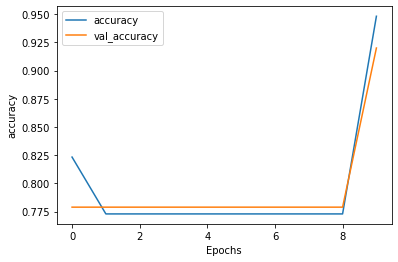

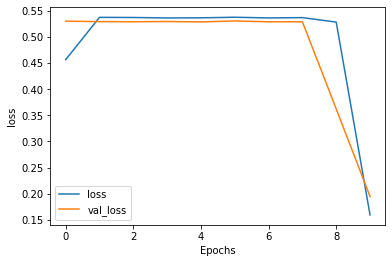


Epoch No.  Train Accuracy  Train Loss     Val Accuracy    Val Loss
       1   0.823263 	   0.456203 	   0.778856 	   0.529903
       2   0.772859 	   0.537191 	   0.778856 	   0.529032
       3   0.772859 	   0.536929 	   0.778856 	   0.528756
       4   0.772859 	   0.536042 	   0.778856 	   0.529238
       5   0.772859 	   0.536272 	   0.778856 	   0.528491
       6   0.772859 	   0.537390 	   0.778856 	   0.530258
       7   0.772859 	   0.536059 	   0.778856 	   0.528687
       8   0.772859 	   0.536682 	   0.778856 	   0.528742
       9   0.772859 	   0.528127 	   0.778856 	   0.362136
      10   0.948142 	   0.159378 	   0.919981 	   0.194712


In [ ]:
history = model.fit(train_seqs, trainY, epochs = EPOCH, validation_data = (val_seqs, valY), verbose = 1)

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

print('\nEpoch No.  Train Accuracy  Train Loss     Val Accuracy    Val Loss')
for i in range(EPOCH):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history.history['accuracy'][i], history.history['loss'][i], history.history['val_accuracy'][i], history.history['val_loss'][i]))

## Find Performance
---
Use the developed model to see how it performs in al the datasets.

Separate performance was calculated for all the Train, Val and Test data.

### Train Data Performance

194/194 [==============================] - 21s 92ms/step - loss: 0.1121 - accuracy: 0.9565
Train Loss: 0.11207843571901321
Train Accuracy: 0.9565427899360657 (Model Metric)
Train Accuracy: 0.9565428109854605 (sklearn Metric)
Train Precision: 0.932319391634981
Train Recall: 0.871977240398293
Train F1-score: 0.9011392870268284


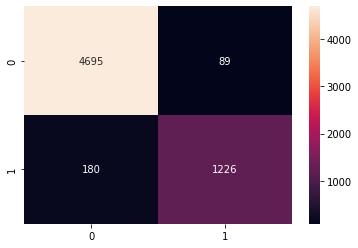

In [ ]:
y_pred = model.predict(train_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(train_seqs, trainY, verbose = 1)
print('Train Loss:', loss)
print('Train Accuracy:', accuracy, '(Model Metric)')
print('Train Accuracy:', accuracy_score(trainY, y_pred), '(sklearn Metric)')
print('Train Precision:', precision_score(trainY, y_pred))
print('Train Recall:', recall_score(trainY, y_pred))
print('Train F1-score:', f1_score(trainY, y_pred))

sns.heatmap(confusion_matrix(trainY, y_pred), annot = True, fmt = 'g')

### Val Data Performance

65/65 [==============================] - 5s 70ms/step - loss: 0.1947 - accuracy: 0.9200
Validation Loss: 0.19471202790737152
Validation Accuracy: 0.9199805855751038 (Model Metric)
Validation Accuracy: 0.9199806013579049 (sklearn Metric)
Validation Precision: 0.8269662921348314
Validation Recall: 0.8070175438596491
Validation F1-score: 0.8168701442841287


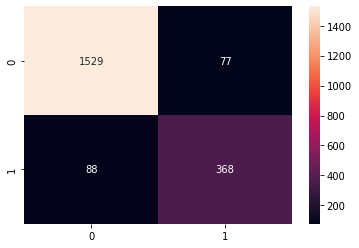

In [ ]:
y_pred = model.predict(val_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(val_seqs, valY, verbose = 1)
print('Validation Loss:', loss)
print('Validation Accuracy:', accuracy, '(Model Metric)')
print('Validation Accuracy:', accuracy_score(valY, y_pred), '(sklearn Metric)')
print('Validation Precision:', precision_score(valY, y_pred))
print('Validation Recall:', recall_score(valY, y_pred))
print('Validation F1-score:', f1_score(valY, y_pred))

sns.heatmap(confusion_matrix(valY, y_pred), annot = True, fmt = 'g')

### Test Data Performance

65/65 [==============================] - 7s 63ms/step - loss: 0.1818 - accuracy: 0.9205
Test Loss: 0.18182244896888733
Test Accuracy: 0.9204655885696411 (Model Metric)
Test Accuracy: 0.9204655674102813 (sklearn Metric)
Test Precision: 0.8582089552238806
Test Recall: 0.7632743362831859
Test F1-score: 0.8079625292740047


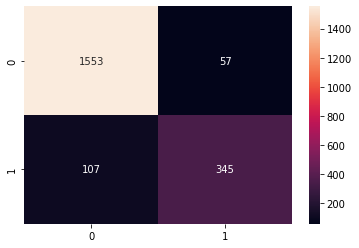

In [ ]:
y_pred = model.predict(test_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(test_seqs, testY, verbose = 1)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy, '(Model Metric)')
print('Test Accuracy:', accuracy_score(testY, y_pred), '(sklearn Metric)')
print('Test Precision:', precision_score(testY, y_pred))
print('Test Recall:', recall_score(testY, y_pred))
print('Test F1-score:', f1_score(testY, y_pred))

sns.heatmap(confusion_matrix(testY, y_pred), annot = True, fmt = 'g')